In [119]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
#Getting Tesla stock data for 1 year
data_tsla = yf.Ticker('TSLA')
price = data_tsla.history(period = '1y')
price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700,0,0
2021-06-28,671.640015,694.700012,670.320007,688.719971,21628200,0,0
2021-06-29,684.650024,687.510010,675.890015,680.760010,17381300,0,0
2021-06-30,679.770020,692.809998,678.140015,679.700012,18924900,0,0
2021-07-01,683.919983,687.989990,672.799988,677.919983,18634500,0,0
...,...,...,...,...,...,...,...
2022-06-17,640.299988,662.909973,639.590027,650.280029,30810900,0,0
2022-06-21,673.809998,730.729980,673.000000,711.109985,40931000,0,0
2022-06-22,703.510010,740.500000,701.479980,708.260010,33702500,0,0


In [121]:
#Calculating Stock returns : percentage change between current element and prior one
tsla_x = price['Close'].pct_change()
print(tsla_x)

Date
2021-06-25         NaN
2021-06-28    0.025079
2021-06-29   -0.011558
2021-06-30   -0.001557
2021-07-01   -0.002619
                ...   
2022-06-17    0.017175
2022-06-21    0.093544
2022-06-22   -0.004008
2022-06-23   -0.004306
2022-06-24    0.045249
Name: Close, Length: 252, dtype: float64


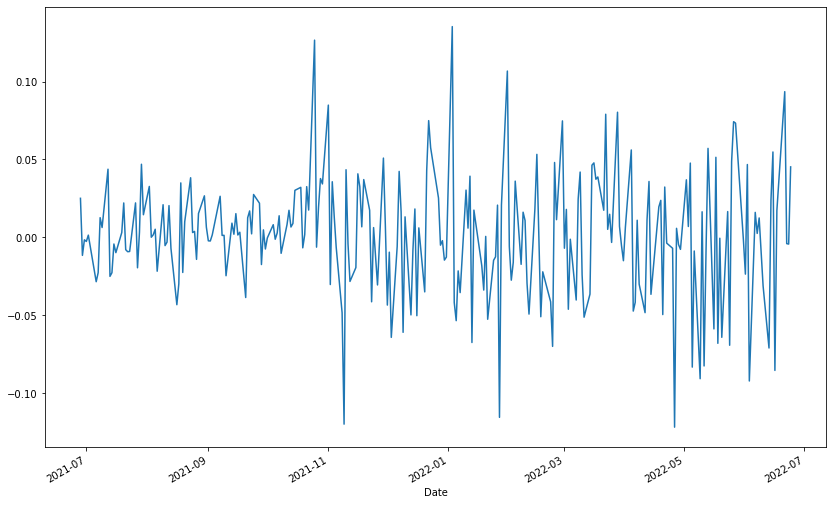

In [122]:
#Visualize results for easier analysis
plt.figure(figsize = (14,9))
tsla_x.plot();

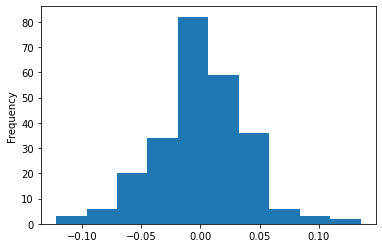

In [123]:
tsla_x.plot(kind = 'hist');

In [124]:
# Calculate the cumulative returns as a percentage using cumprod() function 
# Cumprod() gets cumulative product over a dataframe
returns = (tsla_x+1).cumprod()
print (returns)

Date
2021-06-25         NaN
2021-06-28    1.025079
2021-06-29    1.013232
2021-06-30    1.011654
2021-07-01    1.009005
                ...   
2022-06-17    0.967866
2022-06-21    1.058404
2022-06-22    1.054162
2022-06-23    1.049623
2022-06-24    1.097117
Name: Close, Length: 252, dtype: float64


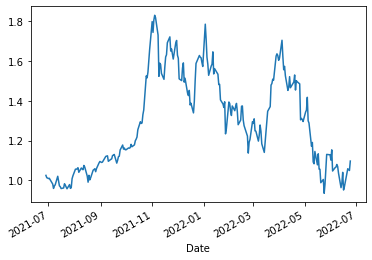

In [125]:
returns.plot();
# The plot shows how a $1 investment would grow in the given time period.

### Now we take the data for Microsoft, Apple and Tesla together and explore starting from the year 2021

In [126]:
data = yf.download("AAPL MSFT TSLA", start = '2021-01-01')
x = data['Close'].pct_change()
x

[*********************100%***********************]  3 of 3 completed


,AAPL,MSFT,TSLA
Date,,,
2020-12-31,NaN,NaN,NaN
2021-01-04,-0.024719,-0.021266,0.034152
2021-01-05,0.012364,0.000965,0.007317
2021-01-06,-0.033662,-0.025929,0.028390
2021-01-07,0.034123,0.028457,0.079447
...,...,...,...
2022-06-17,0.011533,0.010940,0.017175
2022-06-21,0.032761,0.024591,0.093544
2022-06-22,-0.003827,-0.002404,-0.004008


In [127]:
# Get some descriptive statistics using describe()
x.describe()

,AAPL,MSFT,TSLA
count,372.000000,372.000000,372.000000
mean,0.000344,0.000639,0.000861
std,0.018344,0.016808,0.038712
min,-0.056419,-0.047748,-0.121841
25%,-0.009692,-0.007931,-0.021575
50%,0.000681,0.000200,0.001573
75%,0.012658,0.011782,0.020726
max,0.069778,0.051094,0.196412


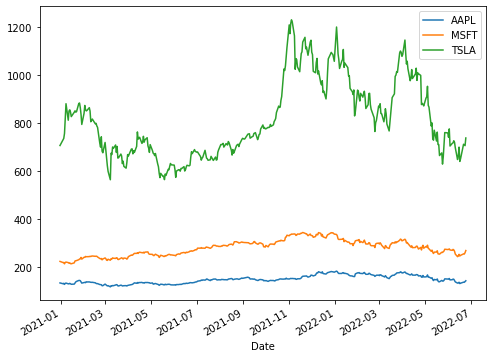

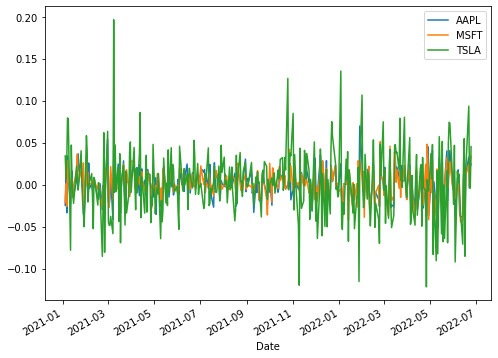

In [128]:
# Here is a chart comparing the daily prices of the 3 stocks.

data['Close'].plot(figsize = (8,6));

# Also, a chart representing their daily returns

ret = data['Close'].pct_change()
ret.plot(figsize = (8,6));


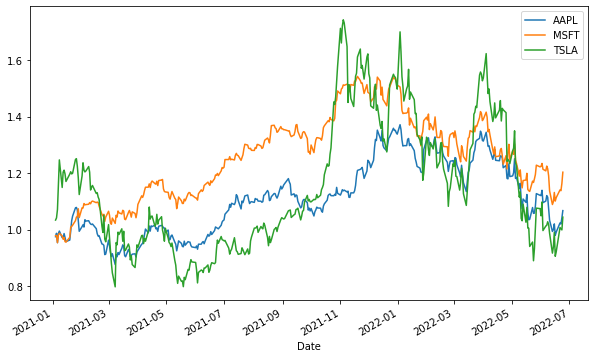

In [129]:
# Cumulative returns for the 3 stocks and their visualization

cum_ret = (ret+1).cumprod()
cum_ret


cum_ret.plot(figsize=(10,6));

### Calculating Correlations

In [130]:
ret
corr = ret.corr()
print (corr)

          AAPL      MSFT      TSLA
AAPL  1.000000  0.760816  0.584808
MSFT  0.760816  1.000000  0.529664
TSLA  0.584808  0.529664  1.000000


#### From the correlation above we can see that all the stocks are positively correlated to each other. While the highest positive correlation is between Apple and Microsoft.

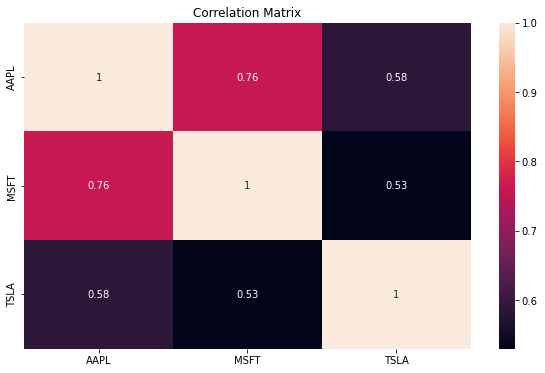

In [131]:
# Creating a heatmap as a visual aid for the correlation matrix.

import seaborn as sns
plt.figure(figsize = (10,6))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True);

### Analyze the portfolio

In [132]:
# Let's define random weights to the stocks

weights = [0.5, 0.3, 0.2]

In [133]:
# To calculate the portfolio returns we'll multiply the daily returns with the weights and add them.

port_ret = (ret*weights).sum(axis = 1)
print (port_ret)

Date
2020-12-31    0.000000
2021-01-04   -0.011909
2021-01-05    0.007935
2021-01-06   -0.018931
2021-01-07    0.041488
                ...   
2022-06-17    0.012484
2022-06-21    0.042467
2022-06-22   -0.003436
2022-06-23    0.016717
2022-06-24    0.031553
Length: 373, dtype: float64


In [134]:
# Total cumulative returns for our portfolio

port_cum = (port_ret + 1).cumprod()
port_cum

Date
2020-12-31    1.000000
2021-01-04    0.988091
2021-01-05    0.995931
2021-01-06    0.977077
2021-01-07    1.017614
                ...   
2022-06-17    1.046894
2022-06-21    1.091352
2022-06-22    1.087602
2022-06-23    1.105783
2022-06-24    1.140674
Length: 373, dtype: float64

### From the above we can see that a 1 Dollar investment in the portfolio at 2020-12-31 would be 1.14 dollars on 2022-06-24. We can see that graphically below.

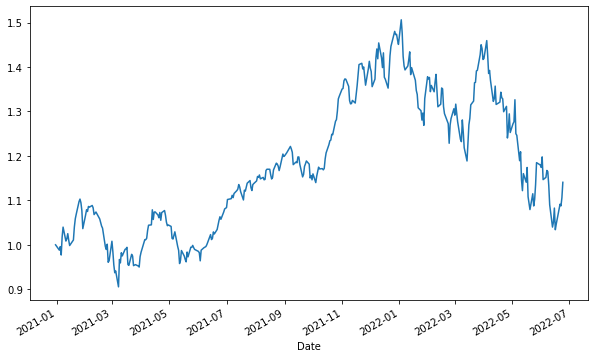

In [135]:
port_cum.plot(figsize = (10,6));

### Calculating Volatility

In [136]:
# Volatility is often used to measure risk. higher volatility means higher risk
# It can be calculated by simply taking the standard deviation of the daily returns.

std = np.std(port_ret)
print (std)

0.019035081098910892


In [137]:
# Calculate annual volatility by taking the square root of the number of trading days in a year and multiply it by daily volatility.
# This will return the risk % of our portfolio

annual_std = np.std(port_ret) * np.sqrt(252)
print (annual_std)

0.30217254464198584


### Sharpe Ratio

In [138]:
# Sharpe ratio is the measure of risk-adjusted return of a portfolio
# Higher sharpe ratio is considered better

# sharpe ratio = average return/volatility
# Multiply result by sqrt of 252 to annualize the sharpe ratio


sharpe = (np.mean(port_ret)/std) * np.sqrt(252)
print (sharpe)

0.4458229977667878


### A sharpe ratio less than 1 is considered sub-optimal. This means that the risk our portfolio encounters isn't being offset well enough by the returns of the portfolio.
### At the current weights, our portfolio does not look good and so we can optimize the portfolio by finding the weights wherein the sharpe ratio is highest.

# Optimizing the portfolio

In [139]:
# we can use the Monte Carlo Simulation to check many random allocations/weights to find the best sharpe ratio

# we create random weights that sum upto 1

rand_wts = np.random.uniform(size = 3)
rand_wts = rand_wts/np.sum(rand_wts)
print (rand_wts)

[0.21677654 0.38748662 0.39573684]


In [142]:
p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 1000

for k in range(0,count):
    wts = np.random.uniform(size = len(ret.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)
    
    #returns
    mean_ret = (ret.mean() * wts).sum()*252
    p_returns.append(mean_ret)
    
    #volatility
    port_ret = (ret*wts).sum(axis = 1)
    annual_std = np.std(port_ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #sharpe ratio
    sharpe = (np.mean(port_ret)/ np.std(port_ret)) * np.sqrt(252)
    p_sharpe.append(sharpe)
    
    
max_ind = np.argmax(p_sharpe)

#Max sharpe ratio
print(p_sharpe[max_ind])

#Weights
print (p_weights[max_ind])

0.6024340901150665
[0.01170692 0.97805084 0.01024224]


#### The above results show the max sharpe ratio acheived and the corresponding weights.
#### Below is the graphical respresentation of the same.

In [144]:
port_opt = pd.Series(p_weights[max_ind], index = ret.columns)
print (port_opt)

AAPL    0.011707
MSFT    0.978051
TSLA    0.010242
dtype: float64


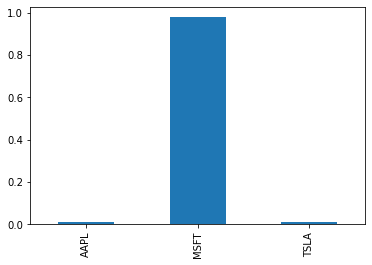

In [147]:
port_opt.plot(kind='bar');

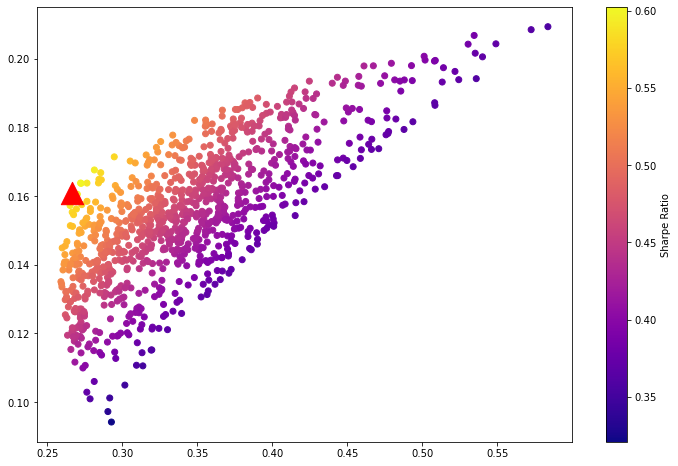

In [162]:
plt.figure(figsize = (12,8))
plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='^', s=500);

## The red marker represents the best porfolio allocation with the highest sharpe ratio